In [11]:
import joblib

import torch
import spconv.pytorch as spconv
import matplotlib.pyplot as plt
import numpy as np


def analyze_tensor(tensor, name):
    print(f"Analysis for {name}:")
    # Check for NaN and Inf values
    if tensor.is_floating_point():
        has_nan = torch.isnan(tensor).any().item()
        has_inf = torch.isinf(tensor).any().item()
        print(f" - Contains NaN: {has_nan}")
        print(f" - Contains Inf: {has_inf}")
        
        if not has_nan and not has_inf:
            # Compute basic statistics
            min_val = tensor.min().item()
            max_val = tensor.max().item()
            mean_val = tensor.mean().item()
            print(f" - Min value: {min_val}")
            print(f" - Max value: {max_val}")
            print(f" - Mean value: {mean_val}")

            # Plot histogram
            tensor = tensor.detach().cpu().numpy()  # Convert to numpy array
            plt.figure(figsize=(10, 4))
            plt.hist(tensor.flatten(), bins=100, color='blue', alpha=0.7)
            plt.title(f"Histogram of {name}")
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
        else:
            print(f" - Skipped plotting for {name} due to NaNs/Infs.")
    else:
        print(" - Non-floating point type, no mean/min/max or histogram.")


point_after_decoder = joblib.load('../point_after_decoder.pkl')
point_after_embedding_2 = joblib.load('../point_after_embedding_2.pkl')
# Now you can inspect various attributes of the point dictionary

In [12]:
# Assuming 'point' is your dictionary loaded from a file or output from a model
# Example: point = joblib.load('point_after_decoder.pkl')  # Adjust as per your file loading method

# point = point_after_decoder
point = point_after_embedding_2

Analysis for coord:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -7.356637954711914
 - Max value: 7.356637954711914
 - Mean value: 0.4981164038181305


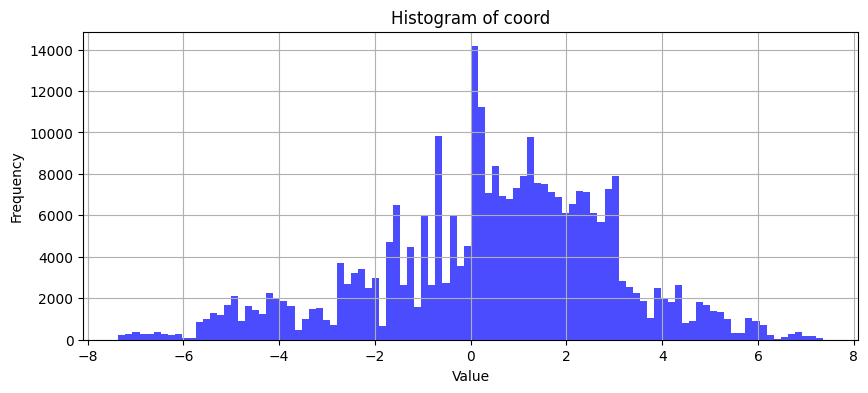

Analysis for grid_coord:
 - Non-floating point type, no mean/min/max or histogram.
Analysis for segment:
 - Non-floating point type, no mean/min/max or histogram.
condition contains non-tensor data or unsupported type: ['Heritage']
Analysis for offset:
 - Non-floating point type, no mean/min/max or histogram.
Analysis for feat:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -0.169921875
 - Max value: 8.1796875
 - Mean value: 0.261962890625


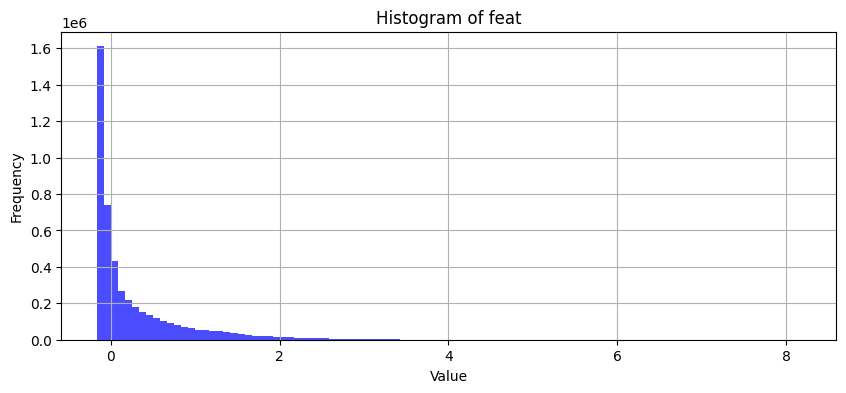

Analysis for context:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -2.884572744369507
 - Max value: 2.6998097896575928
 - Mean value: -0.006473422050476074


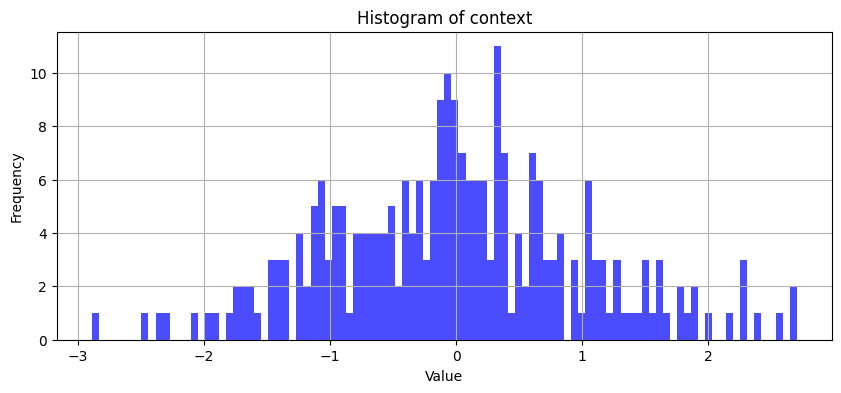

Analysis for batch:
 - Non-floating point type, no mean/min/max or histogram.
serialized_depth contains non-tensor data or unsupported type: 10
Analysis for serialized_code:
 - Non-floating point type, no mean/min/max or histogram.
Analysis for serialized_order:
 - Non-floating point type, no mean/min/max or histogram.
Analysis for serialized_inverse:
 - Non-floating point type, no mean/min/max or histogram.
sparse_shape contains non-tensor data or unsupported type: [559, 1096, 199]
Analysis for sparse_conv_feat:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -0.169921875
 - Max value: 8.1796875
 - Mean value: 0.261962890625


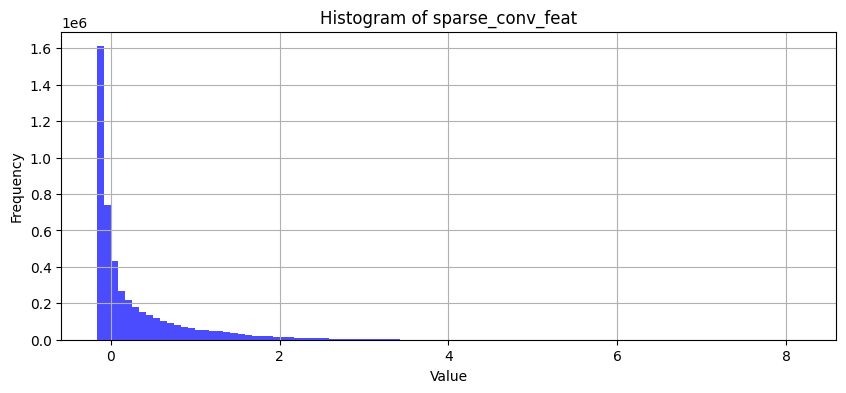

In [24]:

# Iterate over all items in the point dictionary
for key, value in point.items():
    if isinstance(value, torch.Tensor):
        analyze_tensor(value, key)
    elif isinstance(value, spconv.SparseConvTensor):
        analyze_tensor(value.features, key)
    else:
        print(f"{key} contains non-tensor data or unsupported type: {value}")



Analysis for feat:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -701.8760375976562
 - Max value: 951.7010498046875
 - Mean value: 15.556201934814453


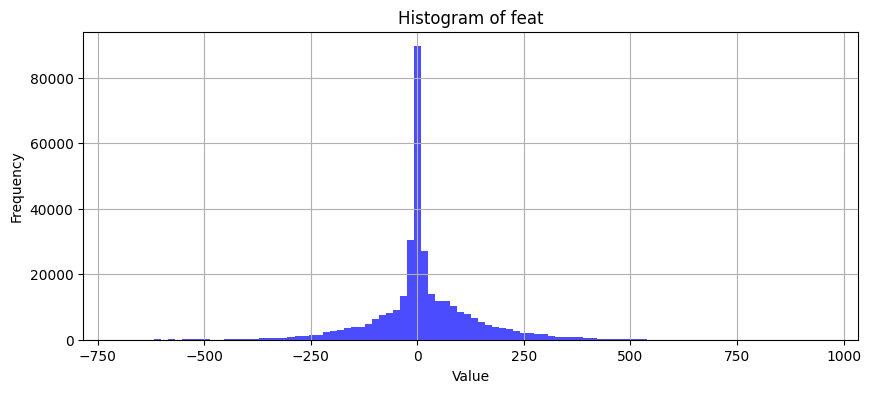

Analysis for coord:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -7.731792449951172
 - Max value: 7.595335960388184
 - Mean value: 0.9673373103141785


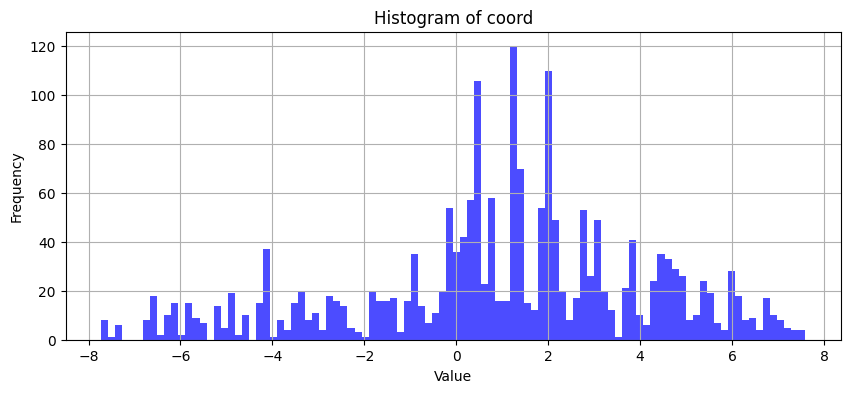

Analysis for grid_coord:
 - Non-floating point type, no mean/min/max or histogram.
Analysis for serialized_code:
 - Non-floating point type, no mean/min/max or histogram.
Analysis for serialized_order:
 - Non-floating point type, no mean/min/max or histogram.
Analysis for serialized_inverse:
 - Non-floating point type, no mean/min/max or histogram.
serialized_depth contains non-tensor data or unsupported type: 7
Analysis for batch:
 - Non-floating point type, no mean/min/max or histogram.
condition contains non-tensor data or unsupported type: ['Heritage']
Analysis for context:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -2.884572744369507
 - Max value: 2.6998097896575928
 - Mean value: -0.006473422050476074


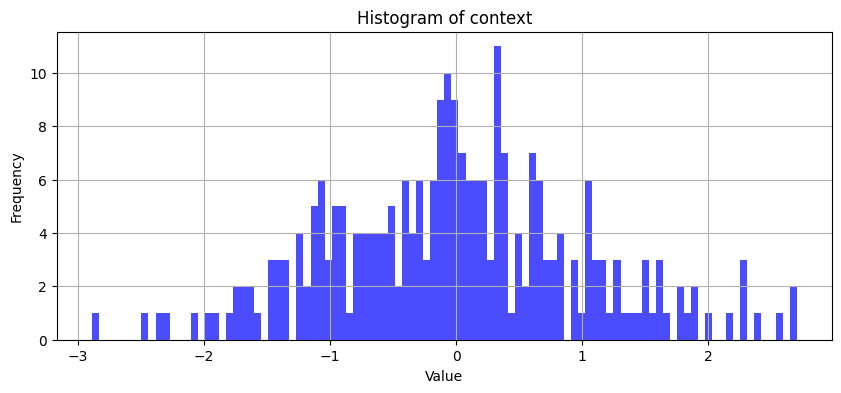

Analysis for pooling_inverse:
 - Non-floating point type, no mean/min/max or histogram.
pooling_parent contains non-tensor data or unsupported type: {'feat': tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       requires_grad=True), 'coord': tensor([[-7.3721, -1.6869,  1.4323],
        [-7.3570, -1.6963,  1.0133],
        [-7.4177, -1.6922,  1.7587],
        ...,
        [ 2.0975,  6.7874,  2.5456],
        [ 2.1025,  6.8803,  2.8000],
        [ 6.1948,  5.7434,  3.0000]], device='cuda:0'), 'grid_coord': tensor([[ 78, 109,   3],
        [ 78, 109,   2],
        [ 78, 109,   4],
        ...,
        [102, 130,   6],
        [102, 130,   7],
        [112, 128,   7]], device='cuda:0'), 'serialized_code': tensor([[ 1707421,  1707420, 

In [11]:
point = joblib.load('../point_before_decoder.pkl')
# Iterate over all items in the point dictionary
for key, value in point.items():
    if isinstance(value, torch.Tensor):
        analyze_tensor(value, key)
    else:
        print(f"{key} contains non-tensor data or unsupported type: {value}")